In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dropout


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
# load dataset
df = pd.read_csv('merged.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8044 entries, 0 to 8043
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      8044 non-null   object 
 1   Date                                      8044 non-null   object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  6299 non-null   float64
 5   Longitude                                 6299 non-null   float64
 6   Gender                                    8037 non-null   object 
 7   Age range                                 7410 non-null   object 
 8   Self-defined ethnicity                    7589 non-null   object 
 9   Officer-defined ethnicity                 7586 non-null   object 
 10  Legislation                         

In [4]:
# print Date column
df['Date']

# drop empty columns
df = df.drop(['Part of a policing operation', 'Policing operation'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8044 entries, 0 to 8043
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      8044 non-null   object 
 1   Date                                      8044 non-null   object 
 2   Latitude                                  6299 non-null   float64
 3   Longitude                                 6299 non-null   float64
 4   Gender                                    8037 non-null   object 
 5   Age range                                 7410 non-null   object 
 6   Self-defined ethnicity                    7589 non-null   object 
 7   Officer-defined ethnicity                 7586 non-null   object 
 8   Legislation                               8044 non-null   object 
 9   Object of search                          7979 non-null   object 
 10  Outcome                             

In [19]:
# get all the unique values in the df column and assign it to a variable
# define object to hold value_counts
value_counts = {}
# loop through each column in the df
for col in df.columns:
    # get the value_counts for each column
    value_counts[col] = df[col].value_counts()
    # print the value_counts for each column
    print(value_counts[col])
    print()

Person search                6121
Person and Vehicle search    1923
Name: Type, dtype: int64

2022-07-29T14:55:10+00:00    8
2022-07-01T19:45:54+00:00    4
2021-09-08T07:04:32+00:00    4
2022-08-12T18:08:27+00:00    4
2022-08-12T18:48:58+00:00    4
                            ..
2020-11-19T08:52:13+00:00    1
2020-11-19T04:13:09+00:00    1
2020-11-19T04:10:46+00:00    1
2020-11-19T03:46:29+00:00    1
2022-11-30T16:09:43+00:00    1
Name: Date, Length: 7589, dtype: int64

51.516814    478
51.512598    192
51.517032    144
51.514203    138
51.506255    132
            ... 
51.519777      1
51.523382      1
51.516738      1
51.522734      1
51.510787      1
Name: Latitude, Length: 745, dtype: int64

-0.081620    477
-0.084967    192
-0.089451    143
-0.094628    138
-0.074901    132
            ... 
-0.092517      1
-0.071420      1
-0.092198      1
-0.091160      1
-0.096385      1
Name: Longitude, Length: 755, dtype: int64

Male      7288
Female     749
Name: Gender, dtype: int64

18-24 

IndexError: index 3 is out of bounds for axis 0 with size 3

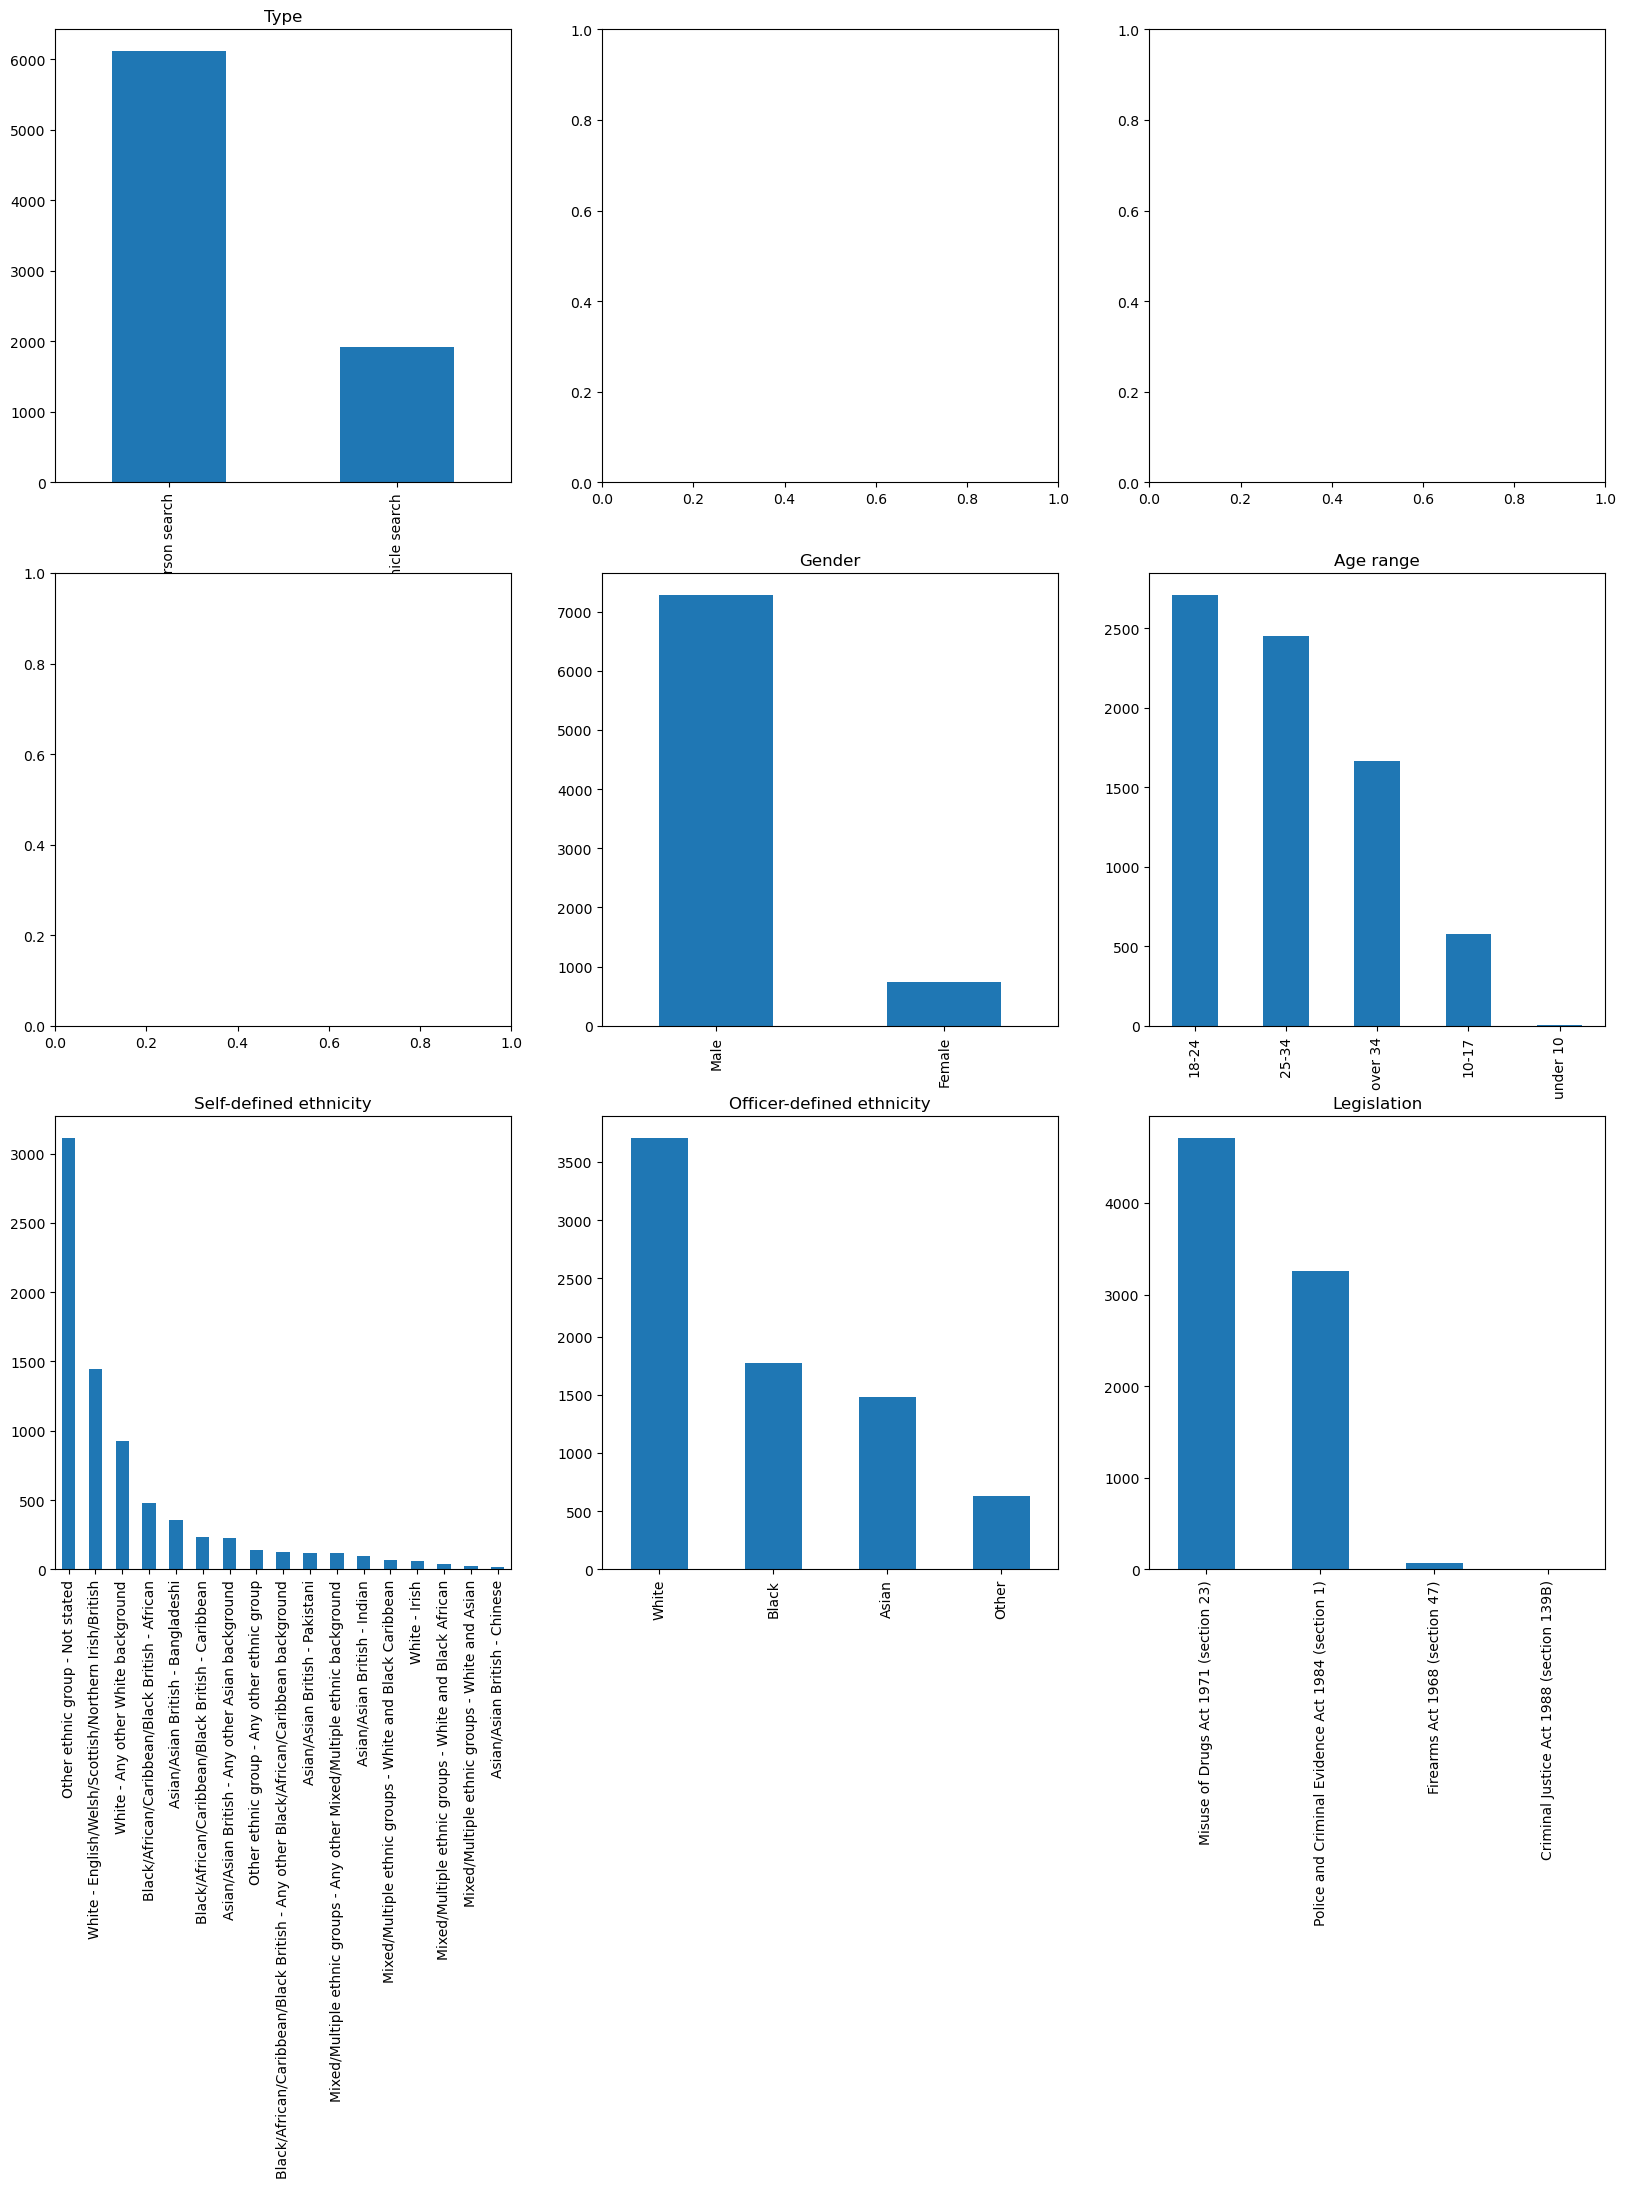

In [45]:
# plot the value_counts from dictionary subplots, excluding longitude and latitude and date
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, col in enumerate(value_counts):
    if col not in ['Longitude', 'Latitude', 'Date']:
        value_counts[col].plot(kind='bar', ax=ax[i//3, i%3])
        ax[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()